# Modelos Autoregressivos Clássicos (AR)

## Conteúdo deste Notebook

1.  **Revisão do Modelo Autoregressivo (AR)**: A intuição de que o passado de uma série contém informação sobre seu futuro.
2.  **A Formulação Matemática**: A equação que define formalmente um processo AR(p).
3.  **Estimação de Parâmetros via Mínimos Quadrados**: Como encontrar os coeficientes ótimos do modelo de forma analítica.
4.  **Geração dos Dados**: Utilização da mesma série de senoide com ruído para comparação.
5.  **Preparação dos Dados para Regressão Linear**: A técnica de janela deslizante para estruturar o problema.
6.  **Implementação com Scikit-Learn**: Treinamento de um modelo de Regressão Linear para simular o processo AR.
7.  **Análise dos Coeficientes**: Inspeção dos parâmetros $\phi_i$ aprendidos pelo modelo.
8.  **Geração de Previsões Autorregressivas**: Utilização do modelo clássico para prever o futuro.

### 1. Introdução aos Modelos Autoregressivos (AR)

Um modelo autorregressivo (AR) é uma representação de um tipo de processo aleatório; como tal, ele é usado para descrever certos processos que variam no tempo em áreas como economia, ciência da computação e outras. O modelo especifica que a variável de saída depende linearmente de seus próprios valores anteriores e de um termo estocástico (um termo de erro imperfeitamente previsível).

Em essência, a ideia fundamental é que o valor de uma série temporal em um ponto $t$ pode ser previsto com base nos valores que ela assumiu em pontos de tempo anteriores, $t-1, t-2, \dots$.

### 2. Definição Matemática

Formalmente, um modelo autorregressivo de ordem $p$, denotado como AR(p), é definido pela seguinte equação:

$$
x_t = c + \sum_{i=1}^{p} \phi_i x_{t-i} + \epsilon_t
$$

Onde:
- $x_t$ é o valor da série no tempo $t$.
- $c$ é uma constante (também chamada de *intercept* ou *drift*).
- $p$ é a ordem do modelo, indicando quantos passos de tempo anteriores são usados como preditores.
- $\phi_1, \phi_2, \dots, \phi_p$ são os parâmetros (coeficientes) do modelo.
- $x_{t-i}$ é o valor da série no tempo $t-i$.
- $\epsilon_t$ é o termo de erro em ruído branco (*white noise*), que representa a informação em $x_t$ que não pode ser explicada pelos valores passados.

### 3. Estimação de Parâmetros via Mínimos Quadrados

A técnica mais comum para estimar os parâmetros de um modelo de regressão linear é o **Método dos Mínimos Quadrados Ordinários** (MQO ou OLS, na sigla em inglês).

A ideia é transformar o problema de série temporal em um problema de regressão linear padrão:
- A variável alvo (Y) é $x_t$.
- As variáveis preditoras (features, X) são os valores passados (lags): $[x_{t-1}, x_{t-2}, \dots, x_{t-p}]$.

O método OLS encontra os valores de $c$ e $\phi_i$ que minimizam a Soma dos Quadrados dos Erros (SQE), ou seja, a soma das diferenças ao quadrado entre os valores observados e os valores previstos pelo modelo:

$$
\min_{c, \phi_i} \sum_{t=p+1}^{T} (x_t - \hat{x}_t)^2 \quad \text{onde} \quad \hat{x}_t = c + \sum_{i=1}^{p} \phi_i x_{t-i}
$$

Este problema possui uma solução analítica (forma fechada), que é implementada de forma eficiente por bibliotecas como Scikit-Learn e Statsmodels.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### 4. Geração dos Dados

Utilizaremos a mesma série temporal de senoide com ruído do notebook anterior. Isso nos permitirá comparar diretamente os resultados da abordagem de rede neural com a abordagem clássica.

In [ ]:
# Definir parâmetros da série
amplitude = 1.0
frequency = 0.02
noise_level = 0.1
n_points = 100

# Gerar a série temporal
time = np.arange(n_points)
pure_sine = amplitude * np.sin(2 * np.pi * frequency * time)
noisy_sine = pure_sine + np.random.normal(0, noise_level, n_points)

# Plotar a série
plt.figure(figsize=(12, 6))
plt.title('Série Temporal - Senoide com Ruído')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.plot(noisy_sine, label='Série com Ruído')
plt.grid(True)
plt.show()

### 5. Preparação dos Dados para Regressão Linear

O processo de janelas deslizantes é idêntico em conceito. A diferença é que o resultado final serão arrays NumPy, que é o formato de entrada esperado pela maioria dos modelos do Scikit-Learn.

In [ ]:
def create_regression_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        # A janela de 'window_size' pontos anteriores
        features = data[i:i+window_size]
        # O ponto seguinte como alvo
        target = data[i+window_size]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y)

# Definir a ordem do modelo (tamanho da janela de lags)
p = 10

X_train, y_train = create_regression_dataset(noisy_sine, window_size=p)

print(f"Dimensões da matriz de features (X): {X_train.shape}")
print(f"Dimensões do vetor alvo (y): {y_train.shape}")

### 6. Implementação com Scikit-Learn

Com os dados no formato de regressão, treinar o modelo AR(p) é trivial. Instanciamos a classe `LinearRegression` e usamos o método `.fit()` para que ela execute o algoritmo de Mínimos Quadrados e encontre os coeficientes.

In [ ]:
# Instanciar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(X_train, y_train)

print("Modelo treinado com sucesso!")

### 7. Análise dos Coeficientes

Uma grande vantagem da abordagem clássica é a interpretabilidade. Podemos inspecionar diretamente os coeficientes $\phi_i$ e o intercepto $c$ que o modelo aprendeu. Isso nos diz explicitamente qual a influência de cada lag na predição do valor atual.

- `model.intercept_`: Corresponde ao termo $c$.
- `model.coef_`: Corresponde ao array de coeficientes $[\phi_p, \phi_{p-1}, \dots, \phi_1]$. Note que o Scikit-learn ordena os coeficientes de acordo com as colunas de entrada. No nosso caso, a primeira coluna é $x_{t-p}$ e a última é $x_{t-1}$.

In [ ]:
# Obter os coeficientes
intercept_c = model.intercept_
coeffs_phi = model.coef_

print(f"Intercepto (c): {intercept_c:.4f}")
# Invertemos para que a visualização seja de phi_1 a phi_p
print(f"Coeficientes (phi_1 a phi_p): \n{np.flip(coeffs_phi)}")


# Plotar os coeficientes
plt.figure(figsize=(10, 5))
plt.title('Coeficientes do Modelo AR(20)')
plt.xlabel('Lag (t-i)')
plt.ylabel('Valor do Coeficiente (phi_i)')
# Usamos stem plot que é comum para visualização de coeficientes
markerline, stemlines, baseline = plt.stem(np.arange(1, p + 1), np.flip(coeffs_phi))
plt.setp(stemlines, 'linewidth', 2)
plt.grid(True)
plt.show()

### 8. Geração de Previsões Autorregressivas

O processo de geração é conceitualmente o mesmo da rede neural: usamos a última sequência de dados conhecidos como *seed*, prevemos o próximo ponto, e então alimentamos essa predição de volta ao modelo para gerar o ponto seguinte.

In [ ]:
# Número de predições futuras a serem geradas
future_steps = 150
# Última janela de dados conhecidos (nossos últimos 'p' pontos)
last_window = noisy_sine[-p:]

# Lista para armazenar as predições
generated_preds = []

# Loop de geração
current_window = last_window
for _ in range(future_steps):
    # O modelo espera uma entrada 2D, então remodelamos a janela
    current_window_reshaped = current_window.reshape(1, -1)

    # Fazer a predição para o próximo passo
    next_pred = model.predict(current_window_reshaped)

    # Armazenar a predição
    generated_preds.append(next_pred[0])

    # Atualizar a janela para a próxima iteração
    current_window = np.append(current_window[1:], next_pred)

# Previsões do modelo sobre os dados de treino (one-step ahead)
train_preds = model.predict(X_train)

#### Visualização dos Resultados

Finalmente, plotamos os dados originais e as predições para avaliar visualmente a performance do nosso modelo AR clássico.

In [ ]:
# Plotar os resultados
plt.figure(figsize=(15, 7))
plt.title('Modelo Autoregressivo Clássico (Linear Regression)')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.grid(True)

# Plotar a série original
plt.plot(time, noisy_sine, label='Dados Originais', alpha=0.8)

# Plotar as predições sobre os dados de treino
plt.plot(time[p:], train_preds, label='Predições de Treino (One-step)', color='orange', linewidth=2)

# Plotar as predições geradas para o futuro
future_time = np.arange(n_points, n_points + future_steps)
plt.plot(future_time, generated_preds, label='Predições Geradas (Autorregressivo)', color='red', linestyle='--')

plt.axvline(x=n_points-1, c='gray', linestyle=':', label='Início da Geração')
plt.legend(loc='upper left')
plt.show()

### Exercícios

#### Exercício 1: O Impacto da Ordem do Modelo (p)

A escolha da ordem `p` (o número de lags) é crucial para o desempenho de um modelo AR. Um `p` muito baixo pode não capturar a dinâmica da série, enquanto um `p` muito alto pode levar a um sobreajuste (*overfitting*) ao ruído.

**Sua Tarefa:**

1.  Reutilize o código do notebook para treinar e avaliar o modelo AR na série `noisy_sine`.
2.  Faça isso para três valores diferentes de `p`:
    * Um valor **baixo**: `p = 3`
    * Um valor **médio** (o original): `p = 20`
    * Um valor **alto**: `p = 50`
3.  Para cada caso, gere um gráfico que mostre os dados originais e as predições futuras (como no exemplo final do notebook).
4.  Responda às seguintes perguntas com base nos seus resultados:
    * O que acontece com a capacidade de previsão do modelo quando `p` é muito pequeno? Ele consegue replicar a forma de onda senoidal?
    * O que você observa nas previsões quando `p` é muito grande? As previsões parecem mais estáveis ou mais erráticas?
    * Comparando os três, qual valor de `p` parece fornecer o melhor equilíbrio e por quê? (Dica: pense sobre o comprimento de um ciclo completo da senoide original).

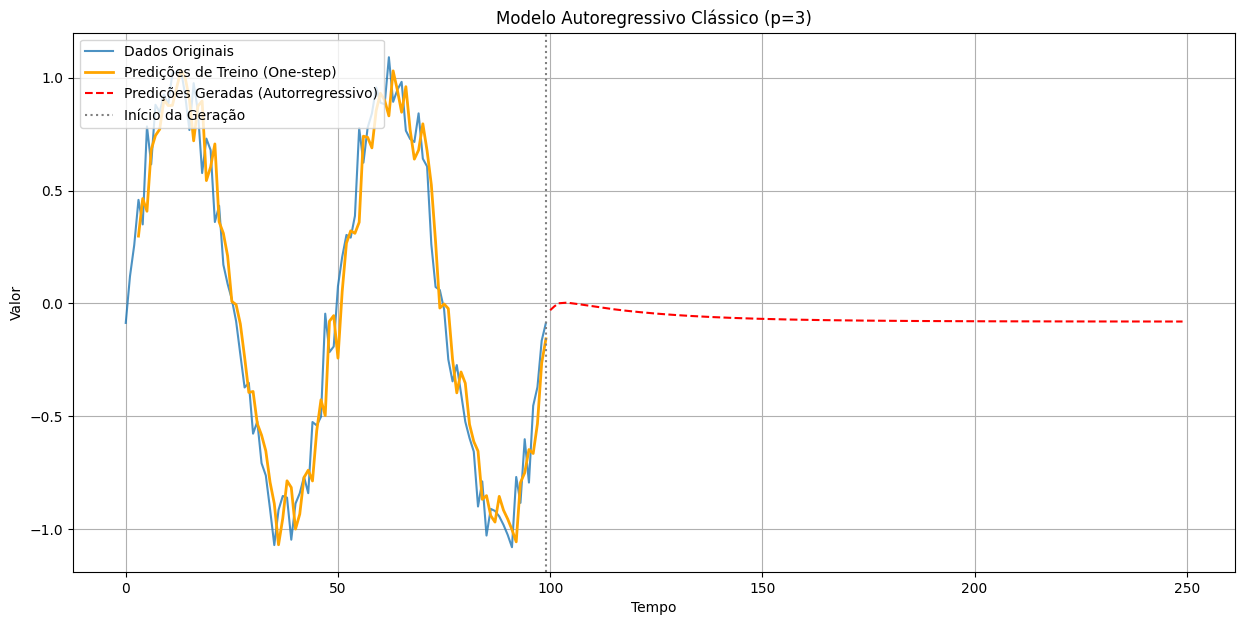

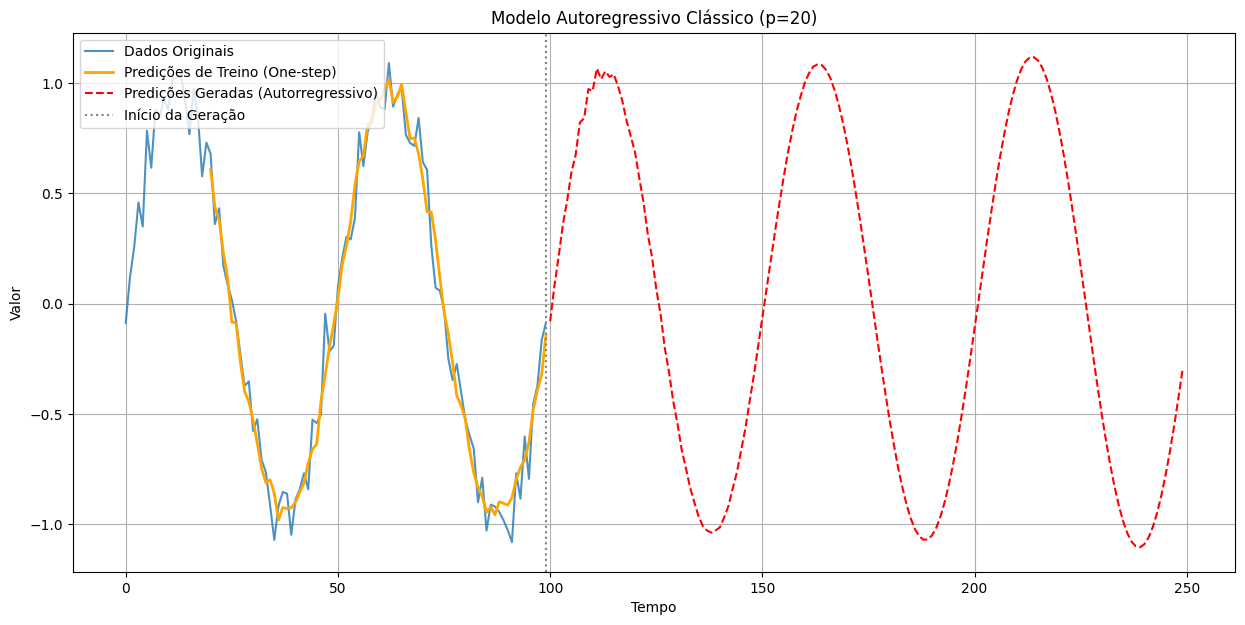

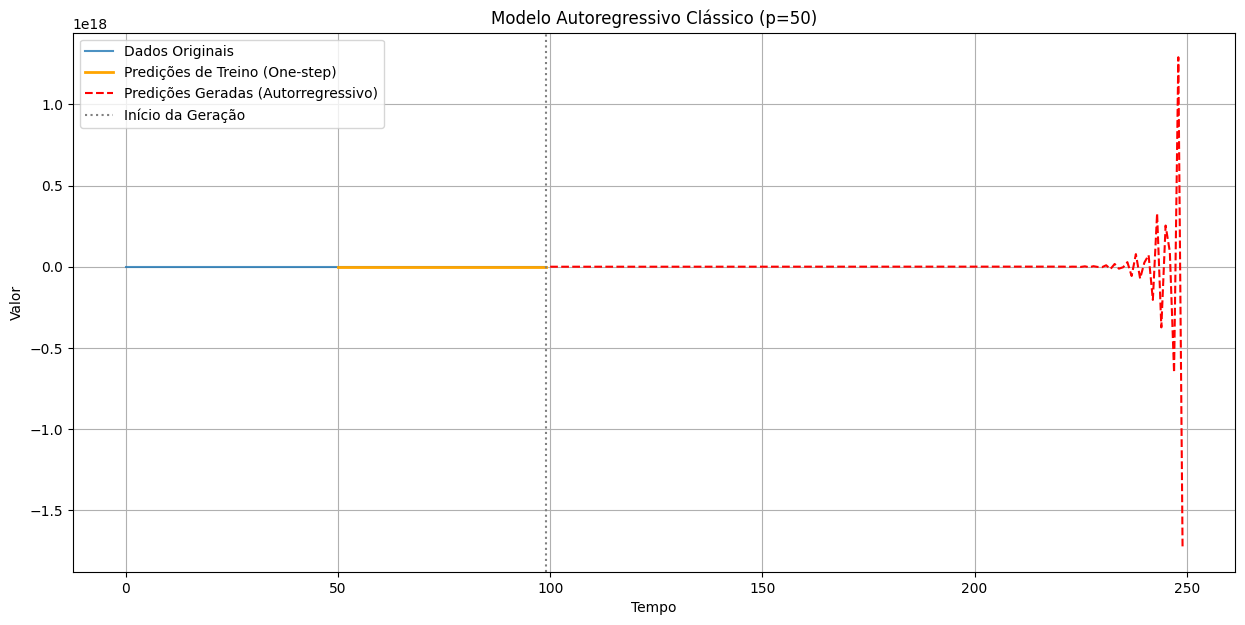

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Função para criar o conjunto de dados de regressão
def create_regression_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        features = data[i:i+window_size]
        target = data[i+window_size]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y)

# Parâmetros da série
amplitude = 1.0
frequency = 0.02
noise_level = 0.1
n_points = 100
future_steps = 150

# Gerar a série temporal
time = np.arange(n_points)
pure_sine = amplitude * np.sin(2 * np.pi * frequency * time)
noisy_sine = pure_sine + np.random.normal(0, noise_level, n_points)

# Valores de p a serem testados
p_values = [3, 20, 50]

# Loop para treinar e avaliar o modelo para cada valor de p
for p in p_values:
    # Criar o conjunto de dados
    X_train, y_train = create_regression_dataset(noisy_sine, window_size=p)

    # Instanciar e treinar o modelo
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Previsões no conjunto de treino (one-step ahead)
    train_preds = model.predict(X_train)

    # Geração de predições futuras
    last_window = noisy_sine[-p:]
    generated_preds = []
    current_window = last_window
    for _ in range(future_steps):
        current_window_reshaped = current_window.reshape(1, -1)
        next_pred = model.predict(current_window_reshaped)
        generated_preds.append(next_pred[0])
        current_window = np.append(current_window[1:], next_pred)

    # Plotar os resultados
    plt.figure(figsize=(15, 7))
    plt.title(f'Modelo Autoregressivo Clássico (p={p})')
    plt.xlabel('Tempo')
    plt.ylabel('Valor')
    plt.grid(True)

    # Série original
    plt.plot(time, noisy_sine, label='Dados Originais', alpha=0.8)

    # Predições de treino
    plt.plot(time[p:], train_preds, label='Predições de Treino (One-step)', color='orange', linewidth=2)

    # Predições futuras
    future_time = np.arange(n_points, n_points + future_steps)
    plt.plot(future_time, generated_preds, label='Predições Geradas (Autorregressivo)', color='red', linestyle='--')

    plt.axvline(x=n_points-1, c='gray', linestyle=':', label='Início da Geração')
    plt.legend(loc='upper left')
    plt.show()

1. Com $ p = 3 $, o modelo não consegue replicar a forma de onda senoidal de maneira eficaz, especialmente nas predições futuras, devido à falta de lags suficientes para capturar o padrão periódico.

2. Com $ p = 50 $, as predições futuras tendem a ser mais erráticas devido ao ao ruído, o que compromete a estabilidade do modelo em relação à forma senoidal ideal.

3. $ p = 20 $ parece oferecer o melhor equilíbrio, pois é grande o suficiente para capturar a dinâmica periódica da senoide sem incluir tantos lags a ponto de sobreajustar o ruído.

#### Exercício 2: O Desafio dos Dados com Tendência (Não-Estacionários)

Modelos AR clássicos assumem que a série temporal é **estacionária**, o que significa que suas propriedades estatísticas (como média e variância) não mudam ao longo do tempo. Uma série com uma tendência clara (por exemplo, que cresce consistentemente) viola essa premissa.

**Sua Tarefa:**

1.  Crie uma nova série temporal adicionando uma tendência linear à série `noisy_sine`.

    ```python
    # Crie uma tendência linear
    trend = np.linspace(0, 4, n_points)
    
    # Adicione a tendência à série original
    data_with_trend = noisy_sine + trend
    
    # Plote para visualizar
    plt.figure(figsize=(12, 6))
    plt.title('Série Temporal com Tendência')
    plt.plot(data_with_trend)
    plt.grid(True)
    plt.show()
    ```

2.  Usando esta nova série `data_with_trend`, repita o processo completo que você fez no notebook:
    * Crie o dataset de treinamento usando a função `create_regression_dataset` (pode usar `p=20`).
    * Treine um novo modelo `LinearRegression`.
    * Gere `future_steps` previsões de forma autorregressiva.
    * Plote os resultados (série com tendência, predições de treino e predições futuras).

3.  Analise o gráfico final e responda:
    * O modelo conseguiu capturar a **tendência** de crescimento contínuo nas suas previsões futuras? O que acontece com as previsões após alguns passos no futuro?
    * Com base no funcionamento de um modelo AR (que usa uma combinação linear de valores *passados* para prever o futuro), por que ele falha em projetar uma tendência?

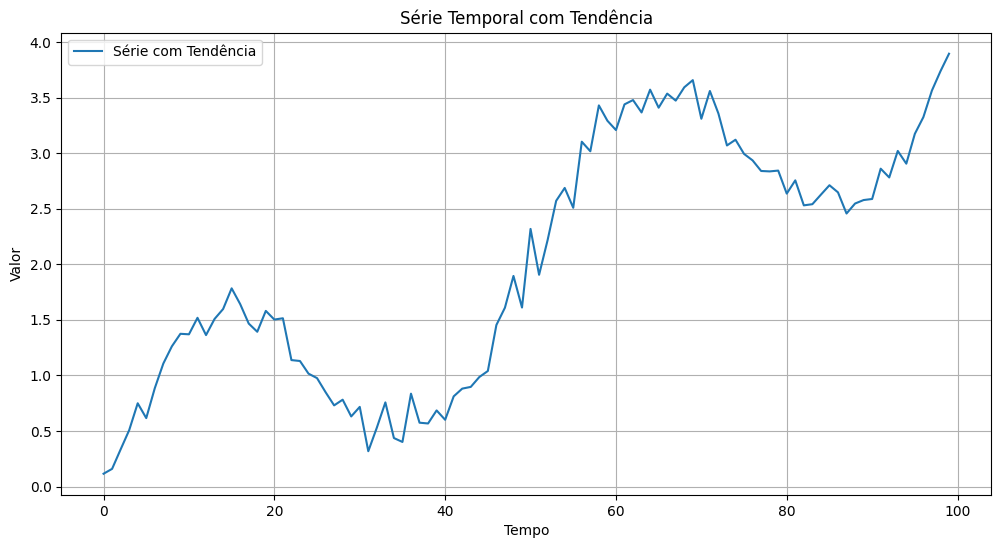

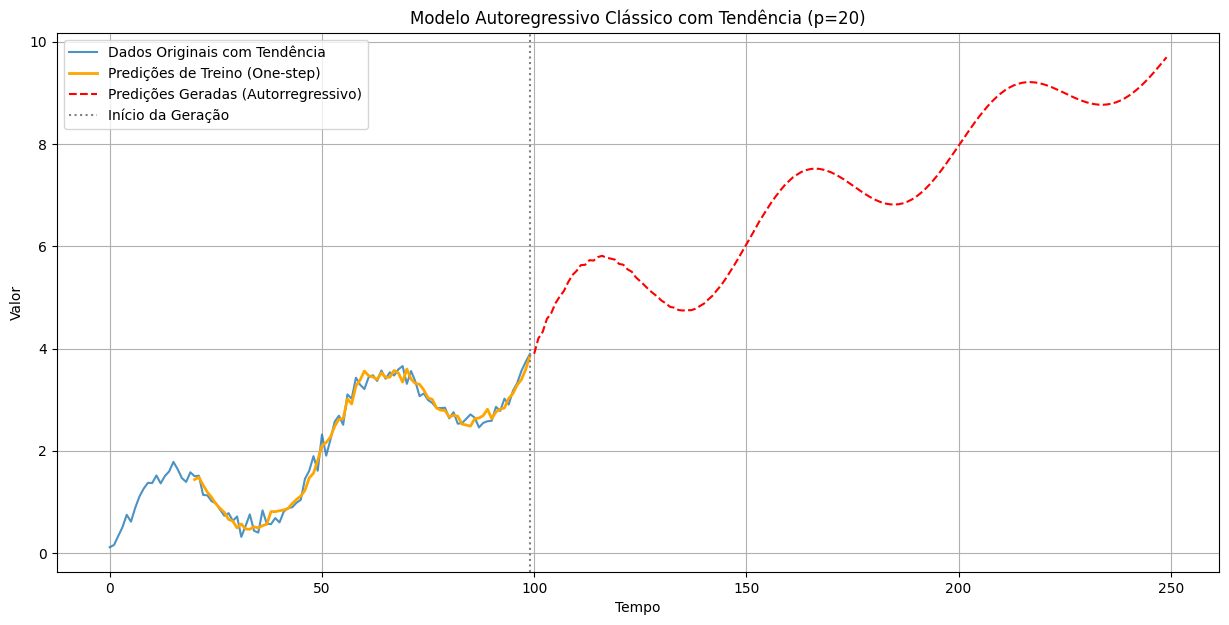

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Função para criar o conjunto de dados de regressão
def create_regression_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        features = data[i:i+window_size]
        target = data[i+window_size]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y)

# Parâmetros da série
amplitude = 1.0
frequency = 0.02
noise_level = 0.1
n_points = 100
future_steps = 150
p = 20

# Gerar a série temporal original (senoide com ruído)
time = np.arange(n_points)
pure_sine = amplitude * np.sin(2 * np.pi * frequency * time)
noisy_sine = pure_sine + np.random.normal(0, noise_level, n_points)

# Criar a tendência linear
trend = np.linspace(0, 4, n_points)

# Adicionar a tendência à série original
data_with_trend = noisy_sine + trend

# Plotar a série com tendência para visualização
plt.figure(figsize=(12, 6))
plt.title('Série Temporal com Tendência')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.plot(time, data_with_trend, label='Série com Tendência')
plt.grid(True)
plt.legend()
plt.show()

# Criar o conjunto de dados de treinamento
X_train, y_train = create_regression_dataset(data_with_trend, window_size=p)

# Instanciar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões no conjunto de treino (one-step ahead)
train_preds = model.predict(X_train)

# Geração de predições futuras
last_window = data_with_trend[-p:]
generated_preds = []
current_window = last_window
for _ in range(future_steps):
    current_window_reshaped = current_window.reshape(1, -1)
    next_pred = model.predict(current_window_reshaped)
    generated_preds.append(next_pred[0])
    current_window = np.append(current_window[1:], next_pred)

# Plotar os resultados
plt.figure(figsize=(15, 7))
plt.title('Modelo Autoregressivo Clássico com Tendência (p=20)')
plt.xlabel('Tempo')
plt.ylabel('Valor')
plt.grid(True)

# Série original com tendência
plt.plot(time, data_with_trend, label='Dados Originais com Tendência', alpha=0.8)

# Predições de treino
plt.plot(time[p:], train_preds, label='Predições de Treino (One-step)', color='orange', linewidth=2)

# Predições futuras
future_time = np.arange(n_points, n_points + future_steps)
plt.plot(future_time, generated_preds, label='Predições Geradas (Autorregressivo)', color='red', linestyle='--')

plt.axvline(x=n_points-1, c='gray', linestyle=':', label='Início da Geração')
plt.legend(loc='upper left')
plt.show()

1. O modelo não consegue capturar a tendência de crescimento contínuo nas predições futuras. Após alguns passos, as predições se estabilizam em um padrão oscilatório, refletindo apenas o componente senoidal da série, sem a tendência linear.

2. O modelo AR falha em projetar a tendência linear porque sua estrutura é baseada em combinações lineares de valores passados, que não conseguem modelar mudanças sistemáticas na média da série. Para capturar a tendência, seria necessário diferenciar a série para remover a tendência ou usar um modelo que incorpore explicitamente a tendência.